# ELG7186 - Winter 2022 - Assignment 3
## Due: <strong>Monday March 21<sup>st</sup> 2022 -- 11:59pm</strong>

In this assignment, you will apply your knowledge of CNNs we want to estimate the growth stage of weeds using the number of leaves of the plant. The more leaves, the more the weed has grown.

The purpose of this assignment is to gain experience building and training neural networks. You will gain:
- More experience training CNNs
- Experience with problem reformulation
- Experience with techniques for improving results (Regularization, Data Augmentation)

You must use Keras with the Tensorflow backend, i.e., the package tensorflow.keras. For this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas but not other deep learning frameworks, e.g., pytorch, mxnet etc.

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

The data for this assignment are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

<a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a> (Required files are posted on Brightspace)

However, you must work with the subset of images posted on BrightSpace as training.zip and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.




In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Use the splits provided in the Brightspace files</li>
<li>Visualize five images from the dataset.</li>
</ul>


In [1]:
# Prepare your dataset here
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from skimage.io import imread
import random
import glob


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/training.zip" 
!unzip "/content/drive/MyDrive/testing.zip" 


Archive:  /content/drive/MyDrive/training.zip
   creating: training/
   creating: training/1/
  inflating: training/1/0.png        
  inflating: training/1/1.png        
  inflating: training/1/10.png       
 extracting: training/1/100.png      
  inflating: training/1/102.png      
  inflating: training/1/104.png      
  inflating: training/1/105.png      
 extracting: training/1/106.png      
 extracting: training/1/107.png      
  inflating: training/1/11.png       
  inflating: training/1/110.png      
  inflating: training/1/111.png      
  inflating: training/1/112.png      
  inflating: training/1/113.png      
  inflating: training/1/116.png      
  inflating: training/1/117.png      
  inflating: training/1/119.png      
  inflating: training/1/12.png       
  inflating: training/1/122.png      
  inflating: training/1/124.png      
  inflating: training/1/128.png      
 extracting: training/1/129.png      
  inflating: training/1/130.png      
  inflating: training/1/131.png 

In [4]:
!ls "/content/"

drive  sample_data  testing  training


In [5]:
#reed training data
url_tr = '/content/drive/MyDrive/training/'
train_df =pd.DataFrame()
for i,x in enumerate([1,2,3,4,6]):
    url = "/content/training/" + str(x)+"/*.png"
    ls_url =glob.glob(url)
    ls_label = [i for c in range(len(ls_url))]
    df_labels =pd.DataFrame(ls_label,columns=['label'])
    df_url =pd.DataFrame(ls_url,columns=['url'])   
    new_df = pd.concat([df_url ,df_labels],ignore_index=True, axis =1)
    train_df = train_df.append(new_df, ignore_index =True)
train_df = train_df.rename({0: 'url', 1: 'label'}, axis=1)  # new method
train_df[:10]

,url,label
0,/content/training/1/65.png,0
1,/content/training/1/217.png,0
2,/content/training/1/203.png,0
3,/content/training/1/274.png,0
4,/content/training/1/277.png,0
5,/content/training/1/110.png,0
6,/content/training/1/139.png,0
7,/content/training/1/172.png,0
8,/content/training/1/98.png,0
9,/content/training/1/64.png,0


In [6]:
#reed testing data
test_df =pd.DataFrame()
for i,x in enumerate([1,2,3,4,6]):
    url = "/content/testing/"+ str(x)+"/*.png"
    ls_url =glob.glob(url)
    ls_label = [i for c in range(len(ls_url))]
    df_labels =pd.DataFrame(ls_label,columns=['label'])
    df_url =pd.DataFrame(ls_url,columns=['url'])   
    new_df = pd.concat([df_url ,df_labels],ignore_index=True, axis =1)
    test_df = test_df.append(new_df, ignore_index =True)
test_df = test_df.rename({0: 'url', 1: 'label'}, axis=1)  # new method
test_df[:10]

,url,label
0,/content/testing/1/288.png,0
1,/content/testing/1/296.png,0
2,/content/testing/1/295.png,0
3,/content/testing/1/303.png,0
4,/content/testing/1/294.png,0
5,/content/testing/1/284.png,0
6,/content/testing/1/301.png,0
7,/content/testing/1/282.png,0
8,/content/testing/1/307.png,0
9,/content/testing/1/304.png,0


In [7]:
train_df.shape

(900, 2)

In [8]:
train =[]
for i in range(len(train_df['url'])):

    train.append([imread(train_df['url'][i]),train_df['label'][i]])
random.shuffle(train)
train  =pd.DataFrame(train,columns=['img','label'])

train[: 10]

,img,label
0,"[[[51, 74, 92], [77, 100, 118], [87, 110, 128]...",0
1,"[[[106, 95, 73], [112, 101, 79], [115, 104, 84...",3
2,"[[[117, 114, 109], [112, 109, 104], [108, 105,...",2
3,"[[[79, 90, 47], [74, 86, 40], [74, 86, 40], [7...",4
4,"[[[75, 74, 70], [80, 79, 75], [87, 86, 82], [9...",3
5,"[[[209, 176, 122], [195, 159, 111], [175, 133,...",0
6,"[[[44, 34, 32], [41, 31, 29], [37, 27, 25], [2...",2
7,"[[[90, 133, 106], [96, 136, 112], [96, 136, 11...",3
8,"[[[99, 77, 64], [106, 84, 71], [103, 81, 68], ...",2
9,"[[[74, 63, 61], [70, 59, 57], [75, 64, 62], [7...",0


In [9]:
test =[]
for i in range(len(test_df['url'])):

    test.append([imread(test_df['url'][i]),test_df['label'][i]])

test  =pd.DataFrame(test,columns=['img','label'])
test[:10]

,img,label
0,"[[[112, 135, 93], [119, 143, 107], [113, 147, ...",0
1,"[[[32, 22, 21], [29, 19, 18], [29, 19, 18], [3...",0
2,"[[[173, 121, 74], [174, 121, 71], [181, 124, 7...",0
3,"[[[156, 139, 123], [162, 145, 129], [167, 150,...",0
4,"[[[103, 93, 91], [99, 89, 87], [94, 84, 82], [...",0
5,"[[[203, 206, 197], [186, 187, 179], [156, 157,...",0
6,"[[[159, 155, 156], [157, 153, 154], [159, 155,...",0
7,"[[[75, 55, 31], [69, 49, 25], [69, 49, 24], [6...",0
8,"[[[133, 127, 129], [143, 137, 139], [122, 116,...",0
9,"[[[152, 148, 139], [141, 137, 128], [142, 138,...",0


In [10]:
def show_images(images, y ,row ):
  fig , ax = plt.subplots(5, 5 ,figsize=(row,row))
  a = np.array(y)
  ls_range =set(y)
  number ={}
  for i,x in enumerate(ls_range):
    number[i] = np.where(a ==x)[0][:5]
  for i in range(len(ls_range)):
      for j in range(5):
        ax[i,j].axis("off")
        ax[i,j].imshow(images[number[i][j]], cmap = matplotlib.cm.binary)
        ax[i,j].set_title("Number of leafs "+ str(i+1))




(900, 2)

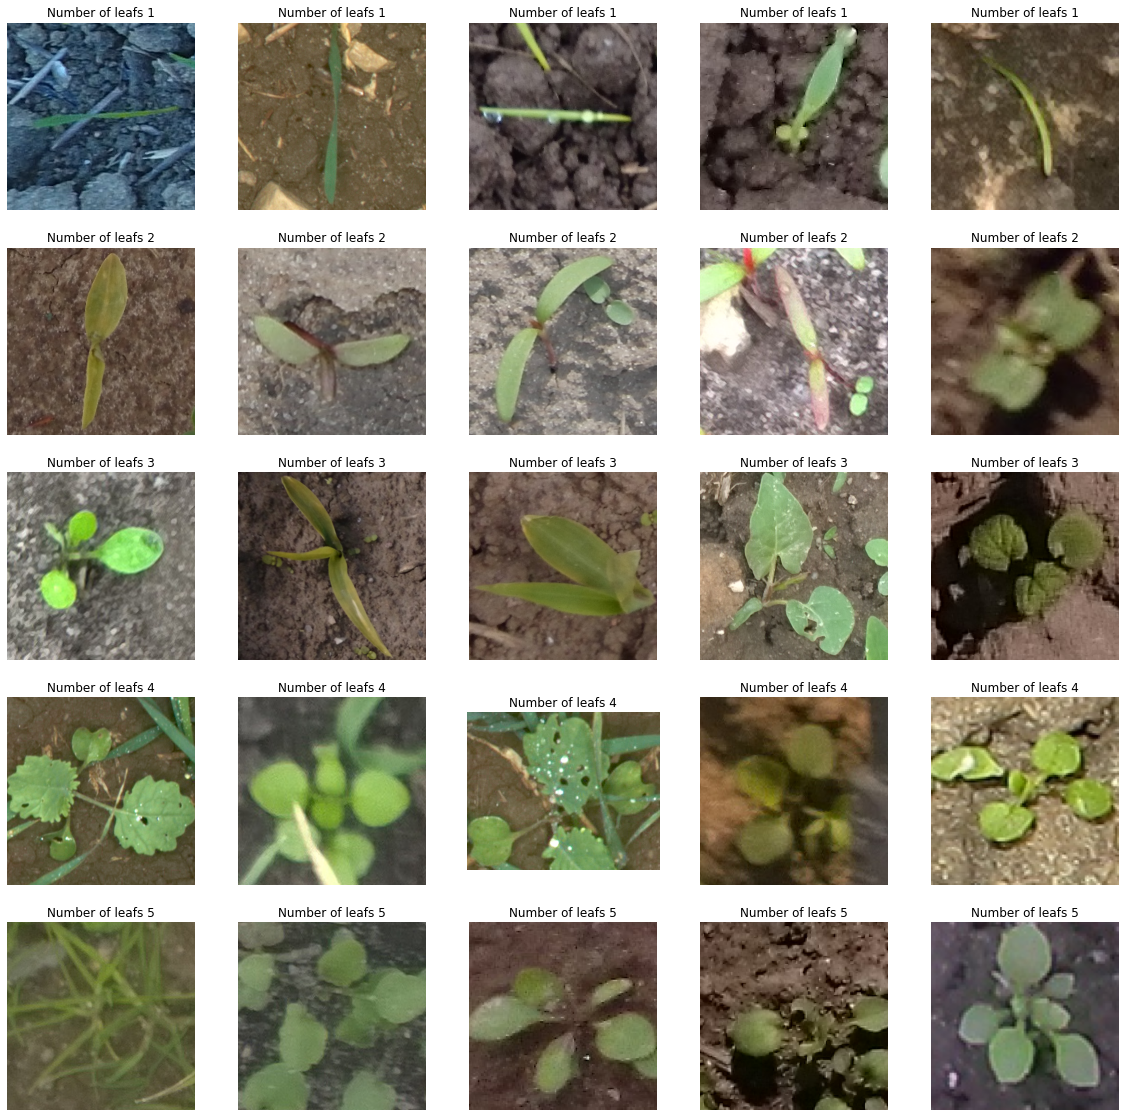

In [11]:
show_images(train['img'],train.label,20)
train_df.shape

## Part 1a. Transfer Learning - Classification Network (3 Marks)
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point. 

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer. 

- You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as you wish but do not use any regularization.
- Train this simple network on the training set while monitoring convergence on the validation set.
- As input to the model use images of size no larger than 128×128.

Note, it is highly recommended to use even smaller input images to try things out. You are not expected to fine-tune the initial VGG layers.

When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


### imports library

In [12]:
# Write your code here


# Write your FC network code here
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score ,confusion_matrix
from tensorflow.keras.utils import to_categorical
#Write your VGG code here
from tensorflow.keras.optimizers import SGD ,Adam 

from keras import layers, models    
from  keras.models import Model
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

### prepare data

In [13]:
# resuze image to every size 
def resize_images(data,size):
  ls_data = []
  y =[]
  for i in range(len(data['img'])):
      if len(data['img'][i].shape) == 3 :
          tf_im = tf.image.resize(data['img'][i], size, method='nearest')
          ls_data.append(tf_im.numpy()/255.0)
          y.append(data['label'][i])
  
  ls_data =np.asarray(ls_data)
  y =np.asarray(y)

  return (ls_data,y)
  
def reshape_images(train ,test):
  v =train.shape[1]*train.shape[2]*train.shape[3]
  X_train= train.reshape(train.shape[0] , v)
  X_test = test.reshape(test.shape[0] , v )
  return X_train ,X_test


In [14]:
# resize images and divide to train and test and validations 
x_vgg_train,y_train  = resize_images(train ,(64, 64))
x_test,y_test = resize_images(test ,(64, 64))

x_val ,y_val = x_vgg_train[800:] ,y_train[800:]
x_train ,y_train = x_vgg_train[:800] ,y_train[:800]

y_tr_k = to_categorical(y_train)
y_te_k = to_categorical(y_test)
y_val_k= to_categorical(y_val)

print(y_tr_k.shape)
print(y_te_k.shape)
print(y_val_k.shape)

print(x_vgg_train.shape)


(800, 5)
(100, 5)
(100, 5)
(900, 64, 64, 3)


### VGG models

In [ ]:
input_shape=(64,64,3)
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
VGG_model.summary()


58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in VGG_model.layers])
outp = layer_dict['block2_pool'].output
vgg_model = tf.keras.Model(inputs=VGG_model.input, outputs=outp)
# make trainable layer flase to don't intialize it 
for layer in vgg_model.layers:
    layer.trainable = False
# last layers output
out = vgg_model.layers[-1].output
out = Conv2D(128, 3, activation='relu', padding='same')(out)
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = Conv2D(32, 3, activation='relu', padding='same')(out)
out = MaxPooling2D(pool_size=2)(out)
# Flatten as before
out = Flatten()(out)
# add layers 
out = Dense(512, activation='relu')(out)
out = Dense(256, activation='relu')(out)
out = Dense(128, activation='relu')(out)
out = Dense(5, activation='softmax')(out)
# build new model 
vgg_model = Model(inputs=vgg_model.input, outputs=out)
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
vgg_model.compile(
    optimizer = 'SGD' ,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
batch_size = 100
epoch = 30 
vgg16_results=vgg_model.fit(x_train, y_tr_k ,batch_size=batch_size, epochs=epoch, validation_data=(x_val , y_val_k))


Epoch 1/30
8/8 [==============================] - 11s 114ms/step - loss: 5.9402 - accuracy: 0.1838 - val_loss: 1.6306 - val_accuracy: 0.1500
Epoch 2/30
8/8 [==============================] - 1s 74ms/step - loss: 1.6075 - accuracy: 0.2313 - val_loss: 1.6128 - val_accuracy: 0.2400
Epoch 3/30
8/8 [==============================] - 1s 72ms/step - loss: 1.5831 - accuracy: 0.2738 - val_loss: 1.6076 - val_accuracy: 0.2200
Epoch 4/30
8/8 [==============================] - 1s 72ms/step - loss: 1.5672 - accuracy: 0.3125 - val_loss: 1.6158 - val_accuracy: 0.2500
Epoch 5/30
8/8 [==============================] - 1s 72ms/step - loss: 1.5493 - accuracy: 0.3388 - val_loss: 1.5981 - val_accuracy: 0.2800
Epoch 6/30
8/8 [==============================] - 1s 72ms/step - loss: 1.5240 - accuracy: 0.3787 - val_loss: 1.5921 - val_accuracy: 0.2400
Epoch 7/30
8/8 [==============================] - 1s 73ms/step - loss: 1.4983 - accuracy: 0.3988 - val_loss: 1.6283 - val_accuracy: 0.2600
Epoch 8/30
8/8 [=========

### plot results 

Text(0, 0.5, 'Losses')

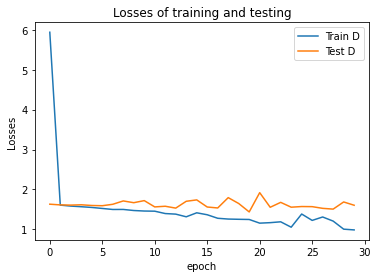

In [ ]:
#plotting loss of traning and testing 
plt.plot(vgg16_results.history['loss'])
plt.plot(vgg16_results.history['val_loss'])
plt.legend(['Train D', 'Test D'])
plt.title('Losses of training and testing')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

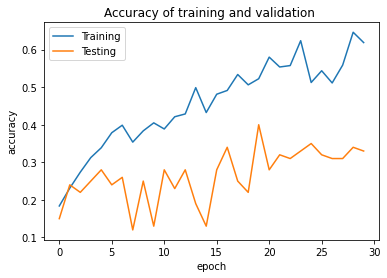

In [ ]:
#plotting accuracy for traning and testing 
plt.plot(vgg16_results.history['accuracy'])
plt.plot(vgg16_results.history['val_accuracy'])
plt.legend(['Training', 'Testing'])
plt.title('Accuracy of training and validation ')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
# get acuracy of test data for model on test data 
test_results = vgg_model.evaluate(x_test, y_te_k,verbose=1)
print('Loss of test data :', test_results[0])
print('Accuracy of  test data :', test_results[1])

4/4 [==============================] - 1s 80ms/step - loss: 1.5753 - accuracy: 0.4000
Loss of test data : 1.5753333568572998
Accuracy of  test data : 0.4000000059604645


In [29]:
def plot_confusion(matrix,title):
    row_sums = matrix.sum(axis=1, keepdims=True)
    norm_conf_mx = cf_mx / row_sums
    plt.matshow(norm_conf_mx)  #, cmap=plt.cm.gray
    plt.title(title)
    plt.colorbar()
    plt.show()


accuracy 0.4
the confusion matrix of test data
[[10  9  0  0  1]
 [ 2 13  0  3  2]
 [ 1  5  0 11  3]
 [ 2  6  0  5  7]
 [ 1  3  0  4 12]]


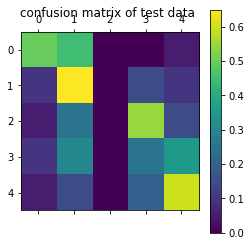

In [ ]:
# print confusion matrix 
pred_prob = vgg_model.predict(x_test)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_test,y_predict)
acc = accuracy_score(y_test,y_predict)
print("accuracy "+ str(acc) )
print("the confusion matrix of test data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of test data ")


accuracy of validation data = 0.33
the confusion matrix of validation data
[[ 4  6  0  1  0]
 [ 1 12  0  7  4]
 [ 2 10  0  8  4]
 [ 1  5  0 11  7]
 [ 1  5  0  5  6]]


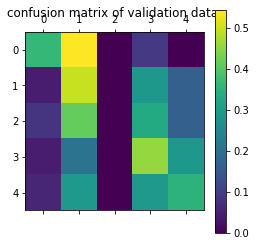

In [ ]:
# print confusion matrix 
pred_prob = vgg_model.predict(x_val)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_val,y_predict)
acc = accuracy_score(y_val,y_predict)
print("accuracy of validation data = "+ str(acc) )
print("the confusion matrix of validation data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of validation data ")


accuracy of validation data =train0.55125
the confusion matrix of train data
[[107  43   0   7  12]
 [  6 126   0  10  14]
 [ 10  50   0  37  59]
 [  3  29   0 103  21]
 [  1  22   0  35 105]]


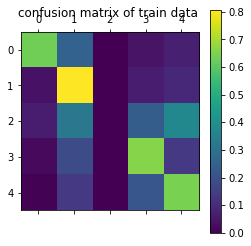

In [ ]:
# print confusion matrix 
pred_prob = vgg_model.predict(x_train)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_train,y_predict)
acc = accuracy_score(y_train,y_predict)
print("accuracy of validation data =train"+ str(acc) )
print("the confusion matrix of train data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of train data ")


## Part 1b. Transfer Learning - Regression Reformulation (3 Marks)

### Step 1 (2)
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again, you are not expected to fine-tune the initial VGG layers.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.

### Step 2 (1)
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

### step 1

### building regression model

In [15]:
input_shape=(64,64,3)
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
VGG_model.summary()


58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [16]:
layer_dict = dict([(layer.name, layer) for layer in VGG_model.layers])
outp = layer_dict['block2_pool'].output
VGG_reg_model = tf.keras.Model(inputs=VGG_model.input, outputs=outp)
# intialize trainable layer flase 
for layer in VGG_reg_model.layers:
    layer.trainable = False
# last layers output
out = VGG_reg_model.layers[-1].output
out = Conv2D(128, 3, activation='relu', padding='same')(out)
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = Conv2D(32, 3, activation='relu', padding='same')(out)
out = MaxPooling2D(pool_size=2)(out)
# Flatten as before
out = Flatten()(out)
# add layers 
out = Dense(512, activation='relu')(out)
out = Dense(256, activation='relu')(out)
out = Dense(128, activation='relu')(out)
out = Dense(1, activation='linear')(out)
# build new model 
VGG_reg_model = Model(inputs=VGG_reg_model.input, outputs=out)
VGG_reg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [23]:
VGG_reg_model.compile( 
    optimizer='Adam' ,   # SGD(lr = 0.008),
    loss = 'mean_absolute_error', #   mean_squared_error mean_squared_logarithmic_error
    metrics=['mse'],
)
batch_size = 100
epoch = 30
results =VGG_reg_model.fit(x_train, y_train ,batch_size=batch_size, epochs=epoch, validation_data=(x_val , y_val))

Epoch 1/30
8/8 [==============================] - 12s 59ms/step - loss: 5.0492 - mse: 77.4419 - val_loss: 1.1758 - val_mse: 2.1118
Epoch 2/30
8/8 [==============================] - 0s 32ms/step - loss: 1.2847 - mse: 2.2910 - val_loss: 1.1502 - val_mse: 1.8893
Epoch 3/30
8/8 [==============================] - 0s 33ms/step - loss: 1.2710 - mse: 2.2729 - val_loss: 1.1480 - val_mse: 1.8190
Epoch 4/30
8/8 [==============================] - 0s 33ms/step - loss: 1.1578 - mse: 1.8507 - val_loss: 1.0257 - val_mse: 1.4323
Epoch 5/30
8/8 [==============================] - 0s 33ms/step - loss: 1.1320 - mse: 1.8494 - val_loss: 1.0550 - val_mse: 1.5500
Epoch 6/30
8/8 [==============================] - 0s 33ms/step - loss: 1.0320 - mse: 1.4852 - val_loss: 1.1188 - val_mse: 1.8499
Epoch 7/30
8/8 [==============================] - 0s 33ms/step - loss: 0.9916 - mse: 1.4649 - val_loss: 0.9891 - val_mse: 1.4012
Epoch 8/30
8/8 [==============================] - 0s 33ms/step - loss: 0.8720 - mse: 1.1671 - v

### plot results 

Text(0, 0.5, 'Losses')

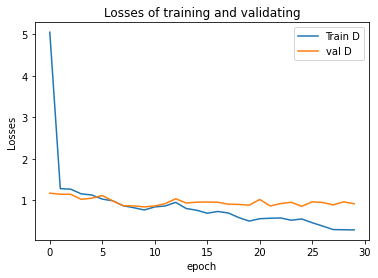

In [24]:
#plotting loss of traning and testing 
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Train D', 'val D'])
plt.title('Losses of training and validating')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'mse')

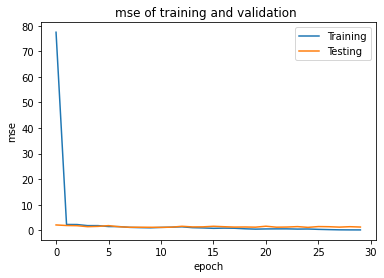

In [26]:
#plotting accuracy for traning and testing 
plt.plot(results.history['mse'])
plt.plot(results.history['val_mse'])
plt.legend(['Training', 'Testing'])
plt.title('mse of training and validation ')
plt.xlabel('epoch')
plt.ylabel('mse')

In [27]:
def get_prediction(pred):
  x =pred[:,0].round()
  pred_val=[]
  for i in x:
    if i <= 0:
      pred_val.append(0.0)
    elif i >= 4 :
      pred_val.append(4.0)
    else:
      pred_val.append(i)
  return pred_val
def get_accuracy(pred, y):
  pred_v = get_prediction(pred)
  acc = accuracy_score(y ,pred_v )
  return acc

 the acuracy of the model on test data =  0.36
the confusion matrix of test data
[[ 6 10  2  2  0]
 [ 4  9  5  2  0]
 [ 2  4  8  3  3]
 [ 0  4  8  6  2]
 [ 2  2  4  5  7]]


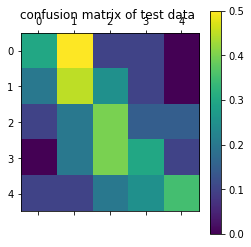

In [30]:
pred = VGG_reg_model.predict(x_test)
prediction = get_prediction(pred)
acc = accuracy_score(y_test ,prediction )
print(" the acuracy of the model on test data = " , acc )
cf_mx = confusion_matrix(y_test ,prediction )
print("the confusion matrix of test data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of test data ")


cofusion matrix of validation data 

 the acuracy of the model on validation data =  0.33
the confusion matrix of validation data
[[7 7 1 1 0]
 [2 6 6 5 0]
 [1 8 5 7 1]
 [1 3 9 6 1]
 [0 1 5 8 9]]


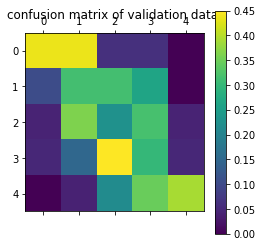

In [31]:
pred = VGG_reg_model.predict(x_val)
prediction = get_prediction(pred)
acc = accuracy_score(y_val ,prediction )
print(" the acuracy of the model on validation data = " , acc )
cf_mx = confusion_matrix(y_val ,prediction )
print("the confusion matrix of validation data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of validation data ")


 the acuracy of the model on test data =  0.9175
the confusion matrix of test data
[[155   7   2   0   0]
 [  3 144  13   1   0]
 [  0   4 147   7   0]
 [  0   1   6 145   8]
 [  0   0   3  11 143]]


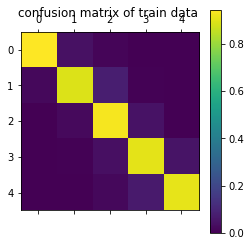

In [32]:
pred = VGG_reg_model.predict(x_train)
prediction = get_prediction(pred)
acc = accuracy_score(y_train ,prediction )
print(" the acuracy of the model on test data = " , acc )
cf_mx = confusion_matrix(y_train ,prediction )
print("the confusion matrix of test data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of train data ")


### step 2
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

- Write your discussion here. 

- part b1: I use the loss function mean_squared_error but the training and validation accuracy doesn’t change overtraining so I change it to mean_squared_logarithmic_error and use linear function as activation but the model overfit he give accuracy 0.9175 in training and .37 in testing if we apply penalty a regularization on the model will test accuracy increased as we see the curve of accuracy decreased that's main the model learn but make overfitting. 

- part a1: the model overfits the and the accuracy in the training more than in testing so he needs some regularization to penalty cut some neurons to decrease overfitting. if data increased will the model increase overfitting  and don't be general  and don't improve performance

## Part 2. Improve your Model (4 Marks)

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
Incorporate Batch Normalization and Dropout into your design the superior network trained in Part 1. You are not expected to fine-tune the initial VGG layers. Again you will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.
 

### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

### Step 1

In [52]:
from tensorflow.keras.layers import Conv2D,Conv1D, MaxPool2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [34]:
# Write your code here
input_shape=(64,64,3)
tuned_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
tuned_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [40]:
layer_dict = dict([(layer.name, layer) for layer in tuned_model.layers])
outp = layer_dict['block2_pool'].output
tuned_model = tf.keras.Model(inputs=tuned_model.input, outputs=outp)
# make trainable layer flase to don't intialize it 
for layer in tuned_model.layers:
    layer.trainable = False
# last layers output
out = tuned_model.layers[-1].output
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=2)(out)
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = BatchNormalization()(out)
out= Dropout(0.3)(out)
out = Conv2D(32, 3, activation='relu', padding='same')(out)
out = MaxPooling2D(pool_size=2)(out)
# Flatten as before
out = Flatten()(out)
# add layers 
out = Dense(512, activation='relu')(out)
out = BatchNormalization()(out)
out= Dropout(0.43)(out)
out = Dense(256, activation='relu')(out)
out = BatchNormalization()(out)
out= Dropout(0.5)(out)
out = Dense(128, activation='relu')(out)
out= Dropout(0.5)(out)
out = BatchNormalization()(out)
out = Dense(5, activation='softmax')(out)
# build new model 
tuned_model = Model(inputs=tuned_model.input, outputs=out)
tuned_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [41]:
tuned_model.compile(
    optimizer= 'SGD',   #   SGD(lr = 0.008),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
batch_size = 128
epoch = 100
results =tuned_model.fit(x_train, y_tr_k ,batch_size=batch_size, epochs=epoch, validation_data=(x_val , y_val_k))

Epoch 1/100
7/7 [==============================] - 2s 84ms/step - loss: 2.1639 - accuracy: 0.2062 - val_loss: 2.0204 - val_accuracy: 0.2300
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 2.1911 - accuracy: 0.2150 - val_loss: 2.1422 - val_accuracy: 0.1700
Epoch 3/100
7/7 [==============================] - 0s 34ms/step - loss: 2.1638 - accuracy: 0.2288 - val_loss: 2.0004 - val_accuracy: 0.2000
Epoch 4/100
7/7 [==============================] - 0s 33ms/step - loss: 2.0477 - accuracy: 0.2275 - val_loss: 2.0442 - val_accuracy: 0.1900
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 2.0535 - accuracy: 0.2438 - val_loss: 1.9148 - val_accuracy: 0.1700
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 2.2072 - accuracy: 0.2000 - val_loss: 2.1424 - val_accuracy: 0.2100
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 2.0078 - accuracy: 0.2525 - val_loss: 1.8032 - val_accuracy: 0.2400
Epoch 8/100
7/7 [===

### plot results 

Text(0, 0.5, 'Losses')

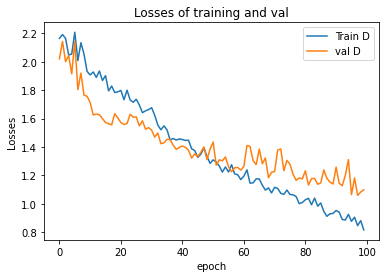

In [42]:
#plotting loss of traning and testing 
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Train D', 'val D'])
plt.title('Losses of training and val')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

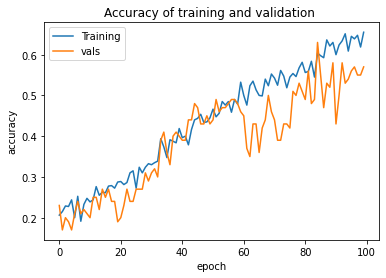

In [43]:
#plotting accuracy for traning and testing 
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'vals'])
plt.title('Accuracy of training and validation ')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [44]:
# get acuracy of test data for model on test data 
test_result = tuned_model.evaluate(x_test, y_te_k,verbose=1)
print('Loss of test data :', test_result[0])
print('Accuracy of  test data :', test_result[1])

4/4 [==============================] - 1s 57ms/step - loss: 1.3409 - accuracy: 0.4800
Loss of test data : 1.3408818244934082
Accuracy of  test data : 0.47999998927116394


In [45]:
def plot_confusion(matrix,title):
    row_sums = matrix.sum(axis=1, keepdims=True)
    norm_conf_mx = cf_mx / row_sums
    plt.matshow(norm_conf_mx)  #, cmap=plt.cm.gray
    plt.title(title)
    plt.colorbar()
    plt.show()


accuracy of test data = 0.48
the confusion matrix of test data
[[14  3  1  0  2]
 [ 5  7  6  2  0]
 [ 4  4  4  3  5]
 [ 2  1  1  9  7]
 [ 2  1  1  2 14]]


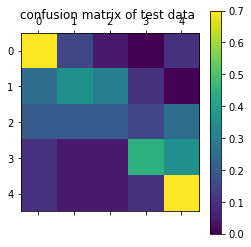

In [46]:
# print confusion matrix 
pred_prob = tuned_model.predict(x_test)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_test,y_predict)
acc = accuracy_score(y_test,y_predict)
print("accuracy of test data = "+ str(acc) )
print("the confusion matrix of test data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of test data ")


accuracy of validation data = 0.57
the confusion matrix of validation data
[[15  1  0  0  0]
 [ 2 13  2  2  0]
 [ 5  6  4  4  3]
 [ 1  0  3  9  7]
 [ 1  3  2  1 16]]


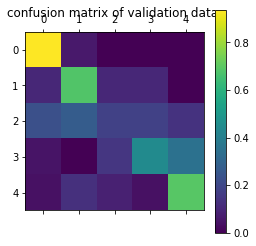

In [47]:
# print confusion matrix for validation data 
pred_prob = tuned_model.predict(x_val)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_val,y_predict)
acc = accuracy_score(y_val,y_predict)
print("accuracy of validation data = "+ str(acc) )
print("the confusion matrix of validation data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of validation data ")


accuracy of trainig data 0.82
the confusion matrix of train data
[[164   0   0   0   0]
 [ 18 138   2   1   2]
 [  7  15  92  30  14]
 [  0   4   6 113  37]
 [  0   2   2   4 149]]


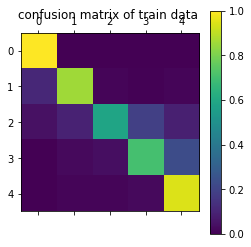

In [48]:

# print confusion matrix for trainnig data 
pred_prob = tuned_model.predict(x_train)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_train,y_predict)
acc = accuracy_score(y_train,y_predict)
print("accuracy of trainig data "+ str(acc) )
print("the confusion matrix of train data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of train data ")


### Step 2 
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1

In [86]:
# Write your code here
input_shape=(64,64,3)
tuned_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
tuned_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [87]:
layer_dict = dict([(layer.name, layer) for layer in tuned_model.layers])
outp = layer_dict['block2_pool'].output
tuned_model = tf.keras.Model(inputs=tuned_model.input, outputs=outp)
# make trainable layer flase to don't intialize it 
for layer in tuned_model.layers:
    layer.trainable = False
# last layers output
out = tuned_model.layers[-1].output
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=2)(out)
out = Conv2D(64, 3, activation='relu', padding='same')(out)
out = BatchNormalization()(out)
out= Dropout(0.3)(out)
out = Conv2D(32, 3, activation='relu', padding='same')(out)
out = MaxPooling2D(pool_size=2)(out)
# Flatten as before
out = Flatten()(out)
# add layers 
out = Dense(512, activation='relu')(out)
out = BatchNormalization()(out)
out= Dropout(0.43)(out)
out = Dense(256, activation='relu')(out)
out = BatchNormalization()(out)
out= Dropout(0.5)(out)
out = Dense(128, activation='relu')(out)
out= Dropout(0.5)(out)
out = BatchNormalization()(out)
out = Dense(5, activation='softmax')(out)
# build new model 
tuned_model = Model(inputs=tuned_model.input, outputs=out)
tuned_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [88]:
                               
BATCH_SIZE = 100
datagen_train =ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    #shear_range=0.2,
    #zoom_range=0.2,
    ##fill_mode='nearest'
    )
datagen_train.fit(x_train)
train_generator = datagen_train.flow(
    x_train,
    y_tr_k,
    batch_size=BATCH_SIZE,
)

In [89]:
 
tuned_model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
epoch = 50
results =tuned_model.fit(train_generator, epochs=epoch, validation_data=(x_val, y_val_k) ) 

Epoch 1/50
8/8 [==============================] - 2s 158ms/step - loss: 2.1096 - accuracy: 0.2237 - val_loss: 1.6483 - val_accuracy: 0.1900
Epoch 2/50
8/8 [==============================] - 1s 130ms/step - loss: 2.1280 - accuracy: 0.2387 - val_loss: 1.6548 - val_accuracy: 0.1900
Epoch 3/50
8/8 [==============================] - 1s 138ms/step - loss: 2.1785 - accuracy: 0.2000 - val_loss: 1.6551 - val_accuracy: 0.1900
Epoch 4/50
8/8 [==============================] - 1s 123ms/step - loss: 2.1256 - accuracy: 0.2087 - val_loss: 1.6470 - val_accuracy: 0.2100
Epoch 5/50
8/8 [==============================] - 1s 124ms/step - loss: 2.1448 - accuracy: 0.2138 - val_loss: 1.6303 - val_accuracy: 0.1800
Epoch 6/50
8/8 [==============================] - 1s 125ms/step - loss: 2.0558 - accuracy: 0.2288 - val_loss: 1.6313 - val_accuracy: 0.1700
Epoch 7/50
8/8 [==============================] - 1s 127ms/step - loss: 2.0626 - accuracy: 0.2075 - val_loss: 1.6327 - val_accuracy: 0.1900
Epoch 8/50
8/8 [====

### plot results 

Text(0, 0.5, 'Losses')

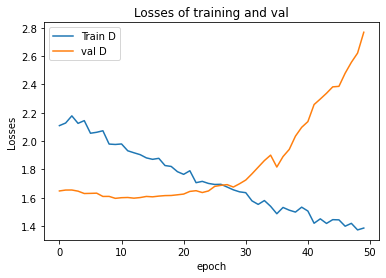

In [90]:
#plotting loss of traning and testing 
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Train D', 'val D'])
plt.title('Losses of training and val')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

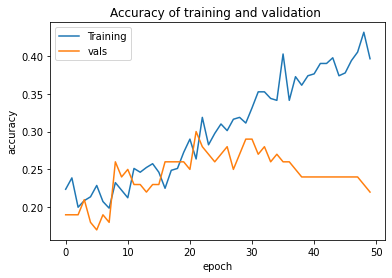

In [91]:
#plotting accuracy for traning and testing 
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'vals'])
plt.title('Accuracy of training and validation ')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [92]:
# get acuracy of test data for model on test data 
test_result = tuned_model.evaluate(x_test, y_te_k,verbose=1)
print('Loss of test data :', test_result[0])
print('Accuracy of  test data :', test_result[1])

4/4 [==============================] - 0s 9ms/step - loss: 3.2835 - accuracy: 0.2000
Loss of test data : 3.2834694385528564
Accuracy of  test data : 0.20000000298023224


In [93]:
def plot_confusion(matrix,title):
    row_sums = matrix.sum(axis=1, keepdims=True)
    norm_conf_mx = cf_mx / row_sums
    plt.matshow(norm_conf_mx)  #, cmap=plt.cm.gray
    plt.title(title)
    plt.colorbar()
    plt.show()


accuracy of test data = 0.2
the confusion matrix of test data
[[ 0 20  0  0  0]
 [ 0 20  0  0  0]
 [ 0 20  0  0  0]
 [ 0 20  0  0  0]
 [ 0 20  0  0  0]]


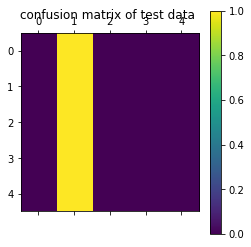

In [94]:
# print confusion matrix 
pred_prob = tuned_model.predict(x_test)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_test,y_predict)
acc = accuracy_score(y_test,y_predict)
print("accuracy of test data = "+ str(acc) )
print("the confusion matrix of test data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of test data ")


accuracy of validation data = 0.22
the confusion matrix of validation data
[[ 0 16  0  0  0]
 [ 0 19  0  0  0]
 [ 0 21  0  0  1]
 [ 0 17  0  0  3]
 [ 0 20  0  0  3]]


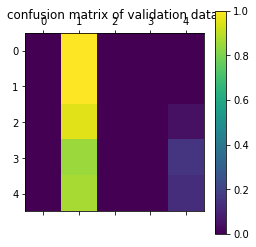

In [95]:
# print confusion matrix for validation data 
pred_prob = tuned_model.predict(x_val)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_val,y_predict)
acc = accuracy_score(y_val,y_predict)
print("accuracy of validation data = "+ str(acc) )
print("the confusion matrix of validation data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of validation data ")


accuracy of trainig data 0.2075
the confusion matrix of train data
[[  0 164   0   0   0]
 [  0 161   0   0   0]
 [  0 148   0   0  10]
 [  0 151   0   0   9]
 [  0 152   0   0   5]]


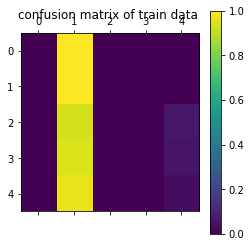

In [96]:
# print confusion matrix for trainnig data 
pred_prob = tuned_model.predict(x_train)
y_predict = pred_prob.argmax(axis=-1)
cf_mx = confusion_matrix(y_train,y_predict)
acc = accuracy_score(y_train,y_predict)
print("accuracy of trainig data "+ str(acc) )
print("the confusion matrix of train data" )
print(cf_mx)
plot_confusion(cf_mx , "confusion matrix of train data ")


- Write your discussion here.


- when applying the model in step 1 and applying regularization by dropout and batch normalization I applied it in the 3 fully connected layers that I added with different drop values the accuracy in the training data and validation increased but when dropped percentage between .1 to .3 the model overfit but when increasing the penalty to .3 to .4 the model balance between train and validation and fit data correct the loss cure of the model in training and validation become near and the accuracy of the model also. the confusion matrix in validation and test become almost the diagonal becomes the highest value because he contains the correct value for every class and the other value is that model predict faults the most class that the model predicts incorrectly is (class 0) and the accuracy increase .
- step 2: when applying the data augmentation to increase the training data of the model the accuracy not increased durning train the model.the different shape from the same data be different in scale, rotate, zoom and different shifting. the image of feature and make the model predict correct more and the loss of the model decreased so much and  accuracy is increasing and  the model need to trained more and the accuracy will increase and the model not overfit becuase the penality in droppout high 
- i try change the image generation function to with diffrent paramters and deffrent values and this is the best one it need to change it more untill reach the augmantation data help to increase accuracy



## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.